# Raster data

# Loading raster data

In [1]:
import rioxarray

In [2]:
raster_file = '../data/agis/L4133A.tif'

In [3]:
elevation_raster = rioxarray.open_rasterio(raster_file)

In [4]:
print(elevation_raster)

<xarray.DataArray (band: 1, y: 3000, x: 3000)> Size: 36MB
[9000000 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 24kB 3.8e+05 3.8e+05 3.8e+05 ... 3.86e+05 3.86e+05
  * y            (y) float64 24kB 6.672e+06 6.672e+06 ... 6.666e+06 6.666e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    _FillValue:     -9999.0
    scale_factor:   1.0
    add_offset:     0.0


In [5]:
elevation_raster.rio.crs

CRS.from_wkt('PROJCS["ETRS89 / TM35FIN(E,N)",GEOGCS["ETRS89",DATUM["European_Terrestrial_Reference_System_1989",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6258"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4258"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",27],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","3067"]]')

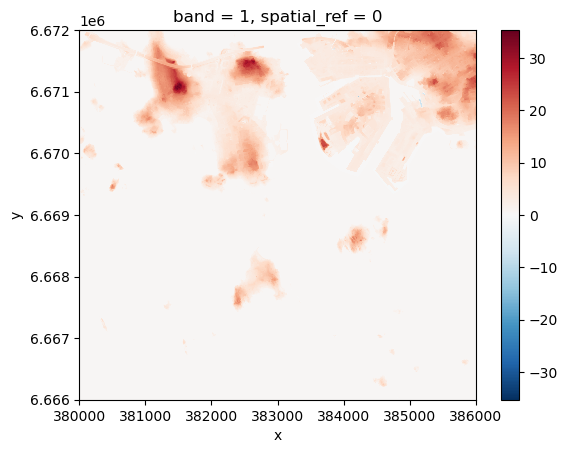

In [6]:
elevation_raster.plot();

In [7]:
# Print basic statistics
print(f"Min value: {elevation_raster.min().item()}")
print(f"Max value: {elevation_raster.max().item()}")
print(f"Mean value: {elevation_raster.mean().item()}")
print(f"Median value: {elevation_raster.median().item()}")
print(f"Standard deviation: {elevation_raster.std().item()}")

Min value: -19.166000366210938
Max value: 35.34000015258789
Mean value: 1.8909481763839722
Median value: 0.328000009059906
Standard deviation: 3.723005771636963


# Loading rasters through WMS

In [8]:
import requests
from owslib.wms import WebMapService
from io import BytesIO
import rasterio
from rasterio.plot import show

In [9]:
wms_url = "https://kartta.hel.fi/ws/geoserver/avoindata/wms"

In [10]:
wms = WebMapService(wms_url, version="1.3.0")

In [12]:
for i, (layer_name, layer) in enumerate(wms.contents.items()): 
    if i < 3: 
        print(f'Layer: {layer_name} - {layer.title}') 
    else: 
        print("More layers available...")
        break

Layer: avoindata:Kantakartta - Kantakartta
Layer: avoindata:Kantakartta_harmaa - Kantakartta_harmaa
Layer: avoindata:Kantakartta_varillinen - Kantakartta_varillinen
More layers available...


In [13]:
layer_name = 'avoindata:Kantakartta'
bbox = (24.93, 60.16, 24.97, 60.18)

In [14]:
wms_request_url = wms.getmap(
    layers=[layer_name], 
    srs='EPSG:4326', 
    bbox=bbox, 
    size=(800,800), # pixels
    format='image/png', 
    transparent=True
)

In [15]:
url = wms_request_url.geturl()

In [16]:
url

'https://kartta.hel.fi/ws/geoserver/avoindata/ows?SERVICE=WMS&service=WMS&version=1.3.0&request=GetMap&layers=avoindata%3AKantakartta&styles=&width=800&height=800&crs=EPSG%3A4326&bbox=60.16%2C24.93%2C60.18%2C24.97&format=image%2Fpng&transparent=TRUE&exceptions=XML&bgcolor=0xFFFFFF'

In [17]:
response = requests.get(url)

/nix/store/sdj6zwvbvgwkx4jk4gxlijlwr9nhgad6-python3-3.12.7-env/lib/python3.12/site-packages/rasterio/io.py:140: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  rd = DatasetReader(mempath, driver=driver, sharing=sharing, **kwargs)


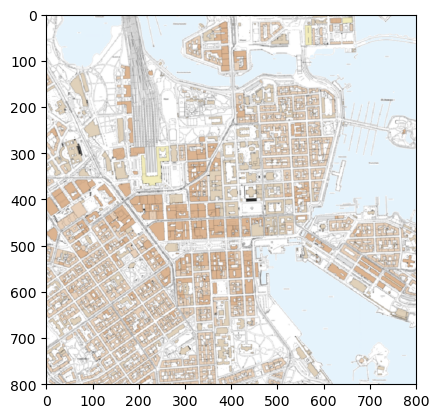

In [19]:
if response.status_code == 200: 
    with rasterio.open(BytesIO(response.content)) as src: 
        show(src) 
else:
    print(f'Failed to retrieve data. Status code: {response.status_code}')

# Multiband Raster File

This is a multiband Sentinel-2 satellite image from Nuuksio National Park near Helsinki.

In [20]:
import rioxarray
import matplotlib.pyplot as plt 
import numpy as np

In [21]:
Nuuksio_sentinel = rioxarray.open_rasterio(
    '../data/agis/sentinel2_Nuuksio_small.tif'
)

(array([3.440269e+06, 1.064389e+06, 1.615999e+06, 1.001865e+06,
        5.705210e+05, 1.751990e+05, 2.464800e+04, 2.109000e+03,
        1.010000e+02, 6.000000e+01]),
 array([0.        , 0.07777   , 0.15554   , 0.23331   , 0.31108001,
        0.38885   , 0.46662   , 0.54439002, 0.62216002, 0.69993001,
        0.77770001]),
 <BarContainer object of 10 artists>)

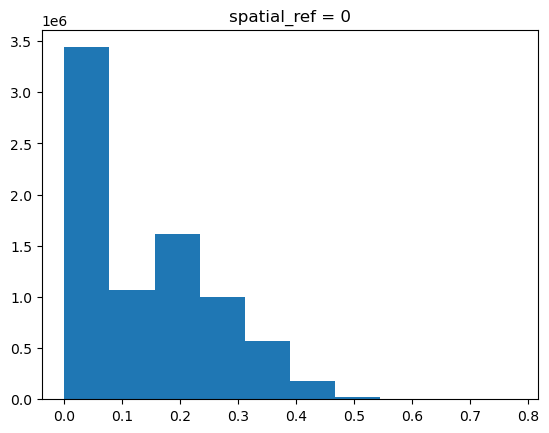

In [22]:
Nuuksio_sentinel.plot()

In [23]:
print(Nuuksio_sentinel)

<xarray.DataArray (band: 12, y: 723, x: 910)> Size: 32MB
[7895160 values with dtype=float32]
Coordinates:
  * band         (band) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
  * x            (x) float64 7kB 3.667e+05 3.667e+05 ... 3.757e+05 3.757e+05
  * y            (y) float64 6kB 6.696e+06 6.696e+06 ... 6.689e+06 6.689e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0


|Band|Description|Wavelength (nm)| 
|---|---|---|
|Band 1|Coastal aerosol|443 nm|
|Band 2|Blue|490 nm|
|Band 3|Green|560 nm|
|Band 4|Red|665 nm|
|Band 5|Vegetation Red Edge|705 nm|
|Band 6|Vegetation Red Edge|740 nm|
|Band 7|Vegetation Red Edge|783 nm|
|Band 8|Near Infrared|842 nm|
|Band 8A|Narrow Near Infrared|865 nm|
|Band 9|Water Vapor|945 nm|
|Band 10|Short-Wave Infrared – Cirrus|1375 nm|
|Band 11|Short-Wave Infrared|1610 nm|
|Band 12|Short-Wave Infrared|2190 nm|

These are the bands in our raster data, in order from 1 to 12. Depending on our data processing needs, we can use this reference to select the relevant bands for tasks such as true color composites (using Bands 4, 3, and 2) or vegetation analysis (using Bands 8 and 4 for NDVI).

In [24]:
red_band = Nuuksio_sentinel.sel(band=4)

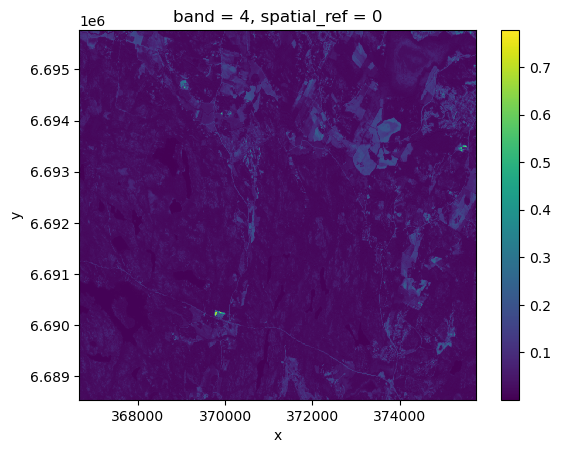

In [25]:
red_band.plot()

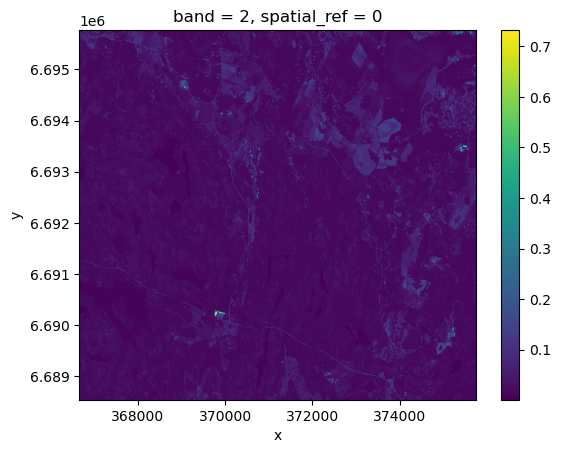

In [26]:
Nuuksio_sentinel.sel(band=2).plot()

# Create an RGB Composite

In [27]:
green_band = Nuuksio_sentinel.sel(band=3)
blue_band = Nuuksio_sentinel.sel(band=2)

In [28]:
rgb_image = np.dstack((red_band.values, green_band.values, blue_band.values))

Normalize the values to between 0 and 1

In [29]:
rgb_image = rgb_image / np.max(rgb_image)

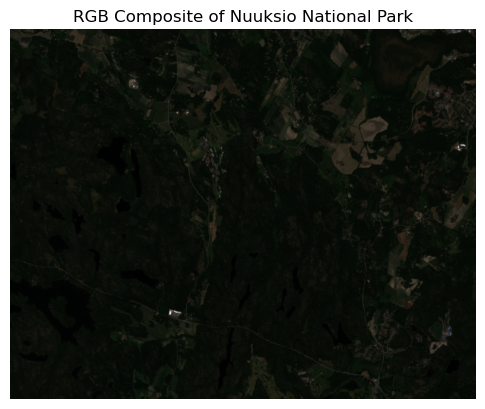

In [30]:
plt.imshow(rgb_image)
plt.title('RGB Composite of Nuuksio National Park')
plt.axis('off')
plt.show()